# **Tweets**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import seaborn as sns
import string

# data = pd.read_csv("/content/drive/MyDrive/DIC/Tweets/ukraine.csv")
# data = pd.read_csv("/content/drive/MyDrive/DIC/Tweets/trans_italian.csv")
# data = pd.read_csv("/content/drive/MyDrive/DIC/Tweets/trans_french.csv")
data = pd.read_csv("/content/drive/MyDrive/DIC/Tweets/trans_german.csv")
print(data.head())

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


                userid       username  \
0            204969153   OneDestiny82   
1            211337962   anselmonadir   
2  1189342374868246528    BornInUSSR5   
3  1411343354483425284  WillM80229711   
4  1441851130842021892    AngryDog616   

                                            acctdesc     location  following  \
0  Ohne Freiheit ist Alles Nichts! Gegen Zwang & ...  Deutschland       2869   
1  We are all pearl fishers ..one way...,\nor ano...      Finland       5001   
2                                                NaN          NaN         31   
3                                                NaN          NaN         58   
4                                                NaN       @hell        1603   

   followers  totaltweets               usercreatedts              tweetid  \
0       2834        55692  2010-10-19 21:43:10.000000  1509681977108140032   
1       3065       576954  2010-11-02 23:59:55.000000  1509682035878764548   
2          1         1380  2019-10-30 

In [2]:
data.columns

Index(['userid', 'username', 'acctdesc', 'location', 'following', 'followers',
       'totaltweets', 'usercreatedts', 'tweetid', 'tweetcreatedts',
       'retweetcount', 'text', 'hashtags', 'language', 'coordinates',
       'favorite_count', 'extractedts', 'processed_text', 'translated'],
      dtype='object')

In [3]:
data.rename(columns = {'translated':'tweet'}, inplace = True)

In [4]:
data

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts,processed_text,tweet
0,204969153,OneDestiny82,Ohne Freiheit ist Alles Nichts! Gegen Zwang & ...,Deutschland,2869,2834,55692,2010-10-19 21:43:10.000000,1509681977108140032,2022-04-01 00:00:06.000000,33,#Habeck #Ukraine #Inflation \nHöchste Inflatio...,"[{'text': 'Habeck', 'indices': [16, 23]}, {'te...",de,NaN,0,2022-04-01 00:14:21.274614,H chste Inflation seit 40 Jahren die Gesellsch...,"Highest inflation for 40 years, society, the f..."
1,211337962,anselmonadir,"We are all pearl fishers ..one way...,\nor ano...",Finland,5001,3065,576954,2010-11-02 23:59:55.000000,1509682035878764548,2022-04-01 00:00:20.000000,1,EU-Parlamentspräsidentin Roberta Metsola wolle...,"[{'text': 'Ukraine', 'indices': [103, 111]}]",de,NaN,0,2022-04-01 00:14:20.963026,EU Parlamentspr sidentin Roberta Metsola wolle...,EU Parliament Speaker Roberta Metsola wanted t...
2,1189342374868246528,BornInUSSR5,NaN,NaN,31,1,1380,2019-10-30 00:45:12.000000,1509682059408674836,2022-04-01 00:00:26.000000,0,@Softwerker @amconmag @RepThomasMassie Neo-Naz...,"[{'text': 'Ukraine', 'indices': [52, 60]}]",de,NaN,0,2022-04-01 00:14:20.843267,Neo Nazis in,Neo Nazis in
3,1411343354483425284,WillM80229711,NaN,NaN,58,2,191,2021-07-03 15:17:42.000000,1509682176874487810,2022-04-01 00:00:54.000000,176,Auch wenn ich damit einigen auf die Nerven geh...,[],de,NaN,0,2022-04-01 00:31:39.025132,Auch wenn ich damit einigen auf die Nerven geh...,Even if I get on some people's nerves Ukraine ...
4,1441851130842021892,AngryDog616,NaN,@hell,1603,611,13752,2021-09-25 19:45:44.000000,1509682186223599616,2022-04-01 00:00:56.000000,8,"Wagenknecht schwurbelt schon wieder!\n""Wirtsch...","[{'text': 'Russland', 'indices': [82, 91]}, {'...",de,NaN,0,2022-04-01 00:44:19.332582,Wagenknecht schwurbelt schon wieder Wirtschaft...,Wagenknecht is already vowing economic warfare...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995,3402919385,GniadekThomas,"Patent and Trade Secrets Litigator, Rechtsanwa...","München, Bayern",419,225,2098,2015-08-04 16:26:38.000000,1510312712257032195,2022-04-02 17:46:25.000000,0,Bemerkenswerter Thread 👇 Entführung der Schwan...,"[{'text': 'Mariupol', 'indices': [56, 65]}]",de,NaN,0,2022-04-02 17:51:05.393438,Bemerkenswerter Thread Entf hrung der Schwange...,Notable thread kidnapping of the pregnant woma...
25996,17909774,Dahlinke2306,I don't got rhythm but I can't live without mu...,"Ölberg, Germany",259,204,54641,2008-12-05 22:19:59.000000,1510312719097942023,2022-04-02 17:46:27.000000,45,Putins perfide Strategie: Er nutzt die Verknap...,[],de,NaN,0,2022-04-02 17:47:54.521171,Putins perfide Strategie Er nutzt die Verknapp...,Putin's perfidious strategy He uses the scarci...
25997,1366107778117492737,SMartyrer,SGE ! Brate ! Alles außer Frankfurt ist sch......,NaN,405,196,1431,2021-02-28 19:27:45.000000,1510312735032160261,2022-04-02 17:46:30.000000,0,Hoffentlich verreckt er bald !!! #putin https...,"[{'text': 'putin', 'indices': [33, 39]}]",de,NaN,0,2022-04-02 18:03:31.288910,Hoffentlich verreckt er bald,Hope he perishes soon
25998,2894474861,yvonneg48306753,Married mummy of 3 🇩🇪🇪🇺,NaN,273,19,586,2014-11-27 10:58:17.000000,1510312736152080387,2022-04-02 17:46:31.000000,3179,Danke deutsches Bruderland!\nThx German Brothe...,"[{'text': 'Germany', 'indices': [77, 85]}, {'t...",de,NaN,0,2022-04-02 18:03:31.276887,Danke deutsches Bruderland Thx German Brother ...,Thank you German brother country Thx German Br...


In [5]:
data = data[["username", "tweet", "language"]]
data.isnull().sum()
data["language"].value_counts()

de    26000
Name: language, dtype: int64

In [6]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


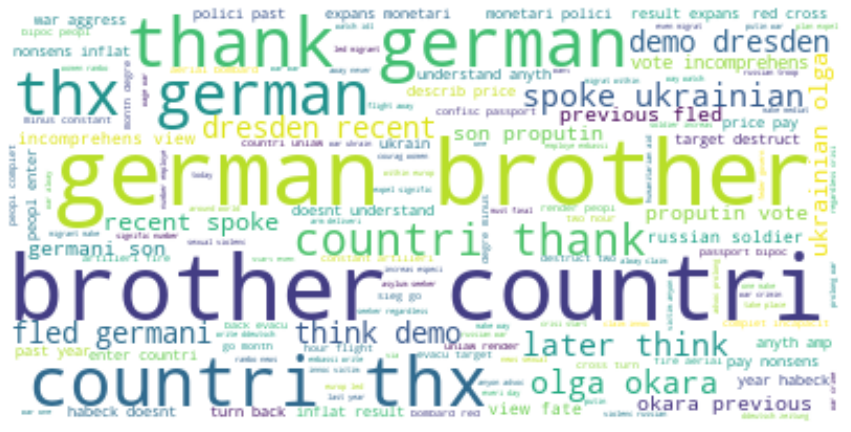

In [7]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


                                               tweet  Positive  Negative  \
0  highest inflat  year societi follow generat be...     0.000     0.215   
1  eu parliament speaker roberta metsola want bri...     0.308     0.000   
2                                           neo nazi     0.000     0.000   
3  even get peopl nerv ukrain need humanitarian a...     0.155     0.131   
4  wagenknecht alreadi vow econom warfar isnt wag...     0.208     0.000   

   Neutral  
0    0.785  
1    0.692  
2    1.000  
3    0.714  
4    0.792  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [9]:
data.describe()

,Positive,Negative,Neutral
count,26000.000000,26000.000000,26000.000000
mean,0.142248,0.144090,0.713119
std,0.175231,0.182369,0.205451
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.545000
50%,0.081000,0.069000,0.699000
75%,0.244000,0.252000,0.882000
max,1.000000,1.000000,1.000000


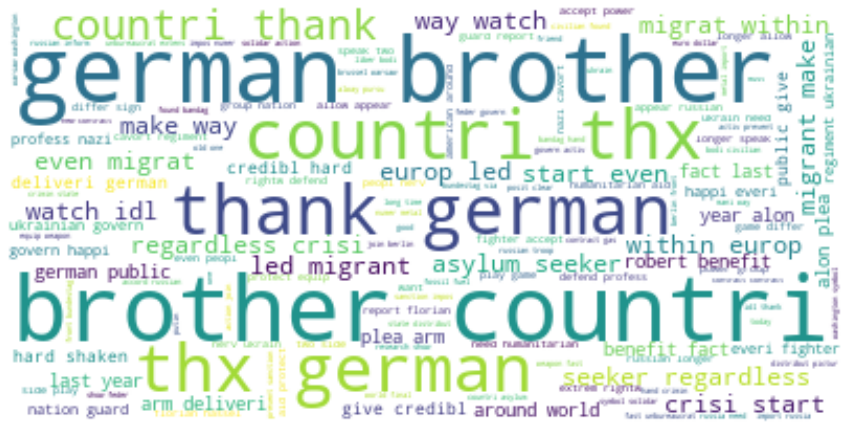

In [10]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

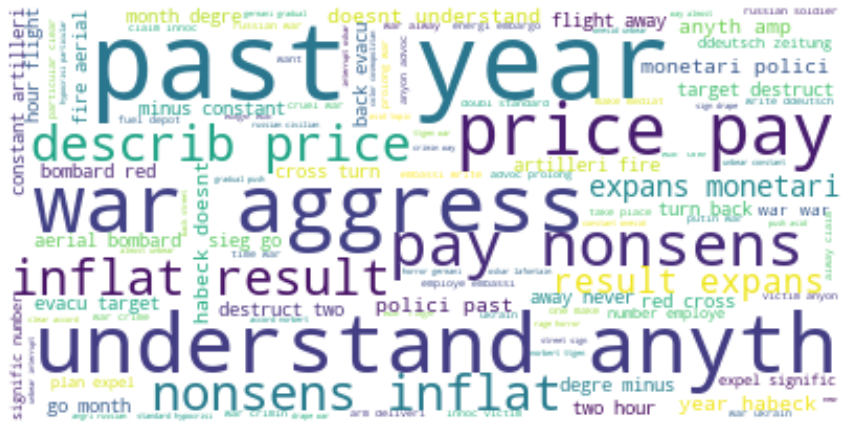

In [11]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()